# Multilevel Bayesian Correlations

In [17]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sb
import pystan

%matplotlib inline
sb.set()

In [ ]:
1) Pearson correlation + stan code + fit
- ensure data is normalized? w/ bayesian fit needs to be zscored?
2) Spearman (mu is always 0.5)
3) Multilevel pearson w/ diagram
4) Multilevel spearman
5) Robust correlations w/ t distribution (should probs only use w/ pearson?)

The Pearson correlation coefficient ($\rho$) is a measure of how correlated two variables are (e.g. $X_1$ and $X_2$), and is the ratio of the true covariance of the two variables to their expected covariance if they were perfectly correlated:

$$
\rho_{X_1,X_2} = \frac{\text{cov}(X_1,X_2)}{\sigma_{X_1} \sigma_{X_2}}
$$

where
* $\text{cov}(X_1, X_2)$ is the covariance between $X_1$ and $X_2$
* $\sigma_{X_1}$ is the standard deviation of $X_1$, and 
* $\sigma_{X_2}$ is the standard deviation of $X_2$

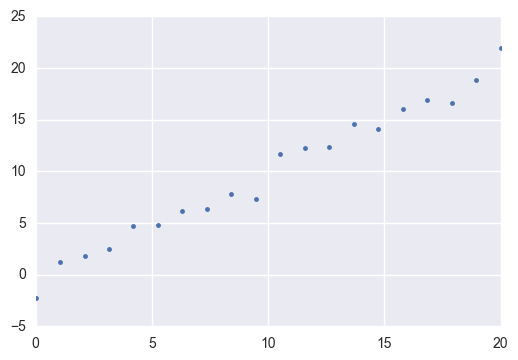

In [18]:
# Create some dummy data with known correlation
X = np.zeros((20,2))
X[:,0] = np.linspace(0, 20, 20)
X[:,1] = X[:,0] + np.random.randn(20)

# Plot dummy data
plt.figure()
plt.plot(X[:,0], X[:,1], '.')
plt.show()

Description of how to build bayesian model of a correlation

In [ ]:
STAN code string for the basic pearson correlation model

In [13]:
# Data for Stan
data = {'N' : X.shape[0], #number of datapoints
        'X' : X} #the data

# Fit the model
model = pystan.StanModel(file='PearsonCorrelation.stan')
fit = model.sampling(data=data, iter=200, chains=5, n_jobs=1)

print(fit)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f1b5027b0d646d57ce6606a29360ac25 NOW.


CompileError: command 'C:\\Program Files (x86)\\Microsoft Visual Studio 14.0\\VC\\BIN\\x86_amd64\\cl.exe' failed with exit status 2